In [ ]:
# prompt: drive mount

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import cv2
import os
import matplotlib.pyplot as plt

# Tratamiento de iamgenes / Data augmentation

Se aplican como prueba varios filtros a todas las imagenes para valorar el realce de algunas caracteristicas visuales

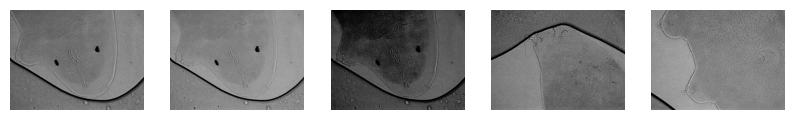

In [ ]:
image_dir = '/content/drive/MyDrive/DataScience/TardisImages/tadisMix'
output_dir = '/content/drive/MyDrive/DataScience/TardisImages/outGrayScaleImg'

gray_images = []


os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(image_dir):
    img_path = os.path.join(image_dir, filename)

    image = cv2.imread(img_path)
    if image is not None:

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray_image)

        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, gray_image)

plt.figure(figsize=(10, 5))
for i in range(min(5, len(gray_images))):
    plt.subplot(1, 5, i+1)
    plt.imshow(gray_images[i], cmap='gray')
    plt.axis('off')
plt.show()


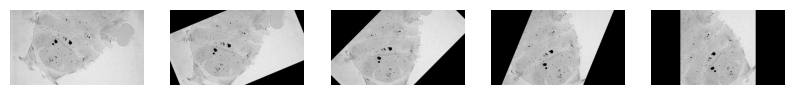

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


input_dir = '/content/drive/MyDrive/DataScience/TardisImages/outGrayScaleImg'
output_dir = '/content/drive/MyDrive/DataScience/TardisImages/tardAugmentedRot'
os.makedirs(output_dir, exist_ok=True)


rotation_step = 22.5
num_rotations = int(360 / rotation_step)


rotated_images = []


for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:

        for i in range(num_rotations):
            angle = i * rotation_step

            image_center = tuple(np.array(image.shape[1::-1]) / 2)
            rotation_matrix = cv2.getRotationMatrix2D(image_center, angle, 1.0)

            rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)


            output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_rot{int(angle)}.png")
            cv2.imwrite(output_path, rotated_image)


            if len(rotated_images) < 5:
                rotated_images.append(rotated_image)


plt.figure(figsize=(10, 5))
for i in range(len(rotated_images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(rotated_images[i], cmap='gray')
    plt.axis('off')
plt.show()


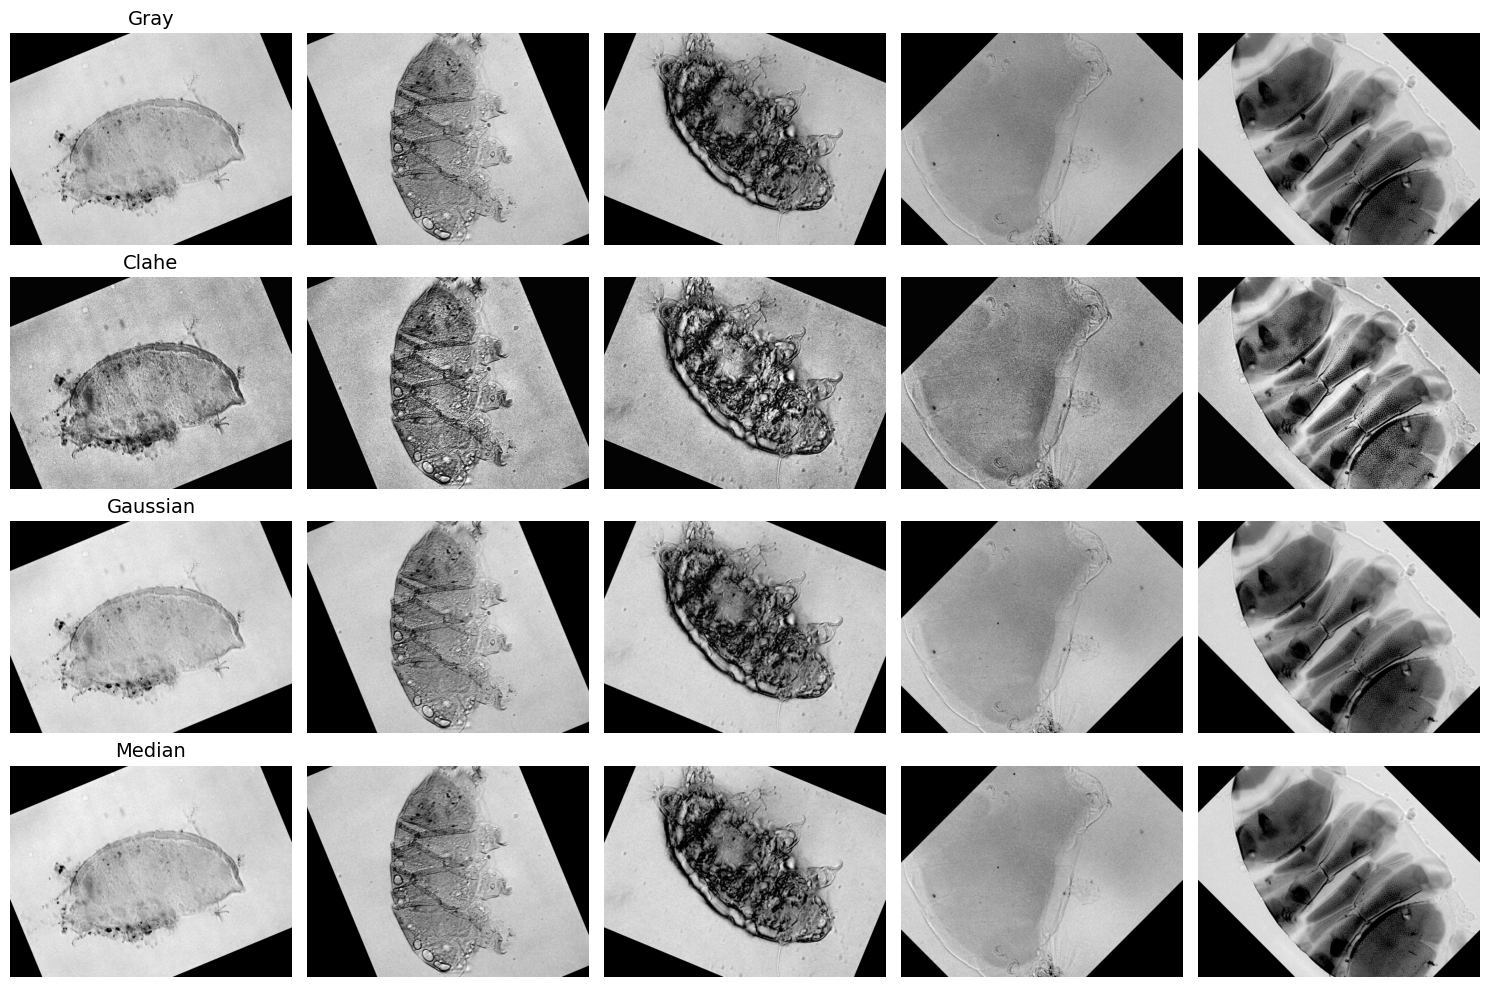

In [ ]:
import random

input_dir = '/content/drive/MyDrive/DataScience/TardisImages/tardAugmentedRot'
output_dir = '/content/drive/MyDrive/DataScience/TardisImages/15testFilters'
os.makedirs(output_dir, exist_ok=True)

all_images = os.listdir(input_dir)
random_images = random.sample(all_images, 15)


processed_images = {'gray': [], 'clahe': [], 'gaussian': [], 'median': []}

for filename in random_images:
    img_path = os.path.join(input_dir, filename)
    image = cv2.imread(img_path)

    if image is not None:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_filename = os.path.splitext(filename)[0] + "_gray.png"
        cv2.imwrite(os.path.join(output_dir, gray_filename), gray_image)

        # CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_image = clahe.apply(gray_image)
        clahe_filename = os.path.splitext(filename)[0] + "_clahe.png"
        cv2.imwrite(os.path.join(output_dir, clahe_filename), clahe_image)

        # fGaussiano
        gaussian_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
        gaussian_filename = os.path.splitext(filename)[0] + "_gaussian.png"
        cv2.imwrite(os.path.join(output_dir, gaussian_filename), gaussian_image)

        # fmediana
        median_image = cv2.medianBlur(gray_image, 5)
        median_filename = os.path.splitext(filename)[0] + "_median.png"
        cv2.imwrite(os.path.join(output_dir, median_filename), median_image)

        if len(processed_images['gray']) < 5:
            processed_images['gray'].append(gray_image)
            processed_images['clahe'].append(clahe_image)
            processed_images['gaussian'].append(gaussian_image)
            processed_images['median'].append(median_image)


fig, axes = plt.subplots(4, 5, figsize=(15, 10))
filter_names = ['gray', 'clahe', 'gaussian', 'median']
for i, filter_name in enumerate(filter_names):
    for j, img in enumerate(processed_images[filter_name]):
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(filter_name.capitalize(), size=14)

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
import cv2


img_path = '/content/drive/MyDrive/DataScience/TardisImages/15testFilters/Image 034_rot180_clahe.png'
image = cv2.imread(img_path)

if image is not None:

    height, width = image.shape[:2]


    total_pixels = height * width
    print(f"Dimensiones de la imagen: {width} x {height}")
    print(f"Número total de píxeles: {total_pixels}")
else:
    print("No se pudo cargar la imagen.")

Dimensiones de la imagen: 1600 x 1200
Número total de píxeles: 1920000


### Se aplica filtro CLAHE a imagenes rotadas

Guardamos en augmenRotCLAHE

In [ ]:


input_dir = '/content/drive/MyDrive/DataScience/TardisImages/tardAugmentedRot'
output_dir = '/content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE'
os.makedirs(output_dir, exist_ok=True)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))


for filename in os.listdir(input_dir):
    img_path = os.path.join(input_dir, filename)

    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:

        clahe_image = clahe.apply(image)


        output_path = os.path.join(output_dir, os.path.splitext(filename)[0] + "_clahe.png")
        cv2.imwrite(output_path, clahe_image)
        print(f"Procesada y guardada: {output_path}")
    else:
        print(f"No se pudo cargar la imagen: {filename}")

Procesada y guardada: /content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE/Image 022_rot0_clahe.png
Procesada y guardada: /content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE/Image 022_rot22_clahe.png
Procesada y guardada: /content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE/Image 022_rot45_clahe.png
Procesada y guardada: /content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE/Image 022_rot67_clahe.png
Procesada y guardada: /content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE/Image 022_rot90_clahe.png
Procesada y guardada: /content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE/Image 022_rot112_clahe.png
Procesada y guardada: /content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE/Image 022_rot135_clahe.png
Procesada y guardada: /content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE/Image 022_rot157_clahe.png
Procesada y guardada: /content/drive/MyDrive/DataScience/TardisImages/augmenRotCLAHE/Image 022_rot180_clahe.pn